## Analyse de l’usage des machines


=== Moyenne de cycles par heure ===
      laverie  hour  cycles
0   Laverie 1     5       3
1   Laverie 1     6      65
2   Laverie 1     7     151
3   Laverie 1     8     311
4   Laverie 1     9     579
5   Laverie 1    10     789
6   Laverie 1    11     591
7   Laverie 1    12     489
8   Laverie 1    13     507
9   Laverie 1    14     632
10  Laverie 1    15     660
11  Laverie 1    16     539
12  Laverie 1    17     482
13  Laverie 1    18     432
14  Laverie 1    19     224
15  Laverie 1    20      87
16  Laverie 1    21      46
17  Laverie 1    22      18
18  Laverie 1    23       6
19  Laverie 2     6       4
20  Laverie 2     7     106
21  Laverie 2     8     235
22  Laverie 2     9     322
23  Laverie 2    10     454
24  Laverie 2    11     457
25  Laverie 2    12     557
26  Laverie 2    13     497
27  Laverie 2    14     534
28  Laverie 2    15     553
29  Laverie 2    16     494
30  Laverie 2    17     414
31  Laverie 2    18     391
32  Laverie 2    19     215
33  Laverie

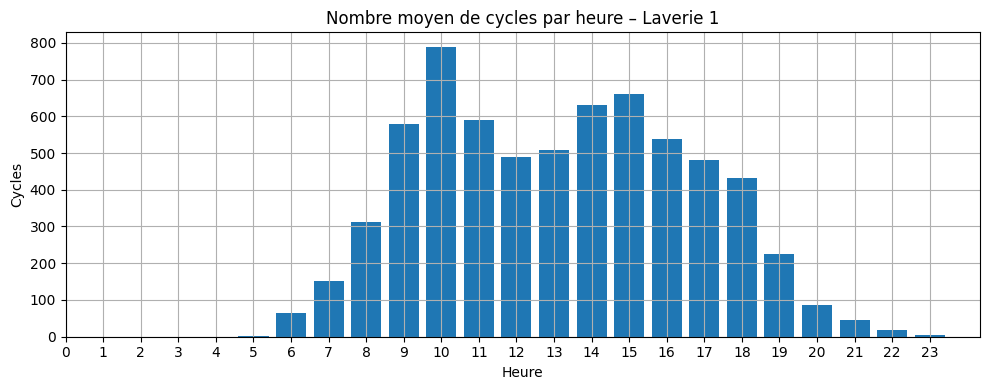

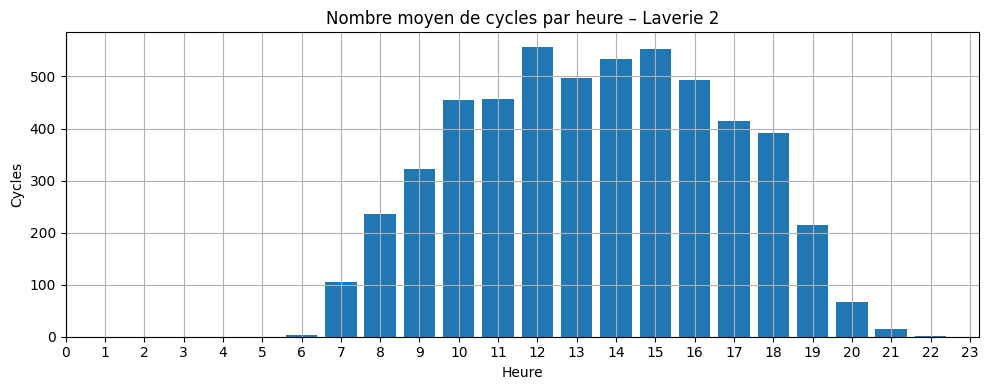

c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


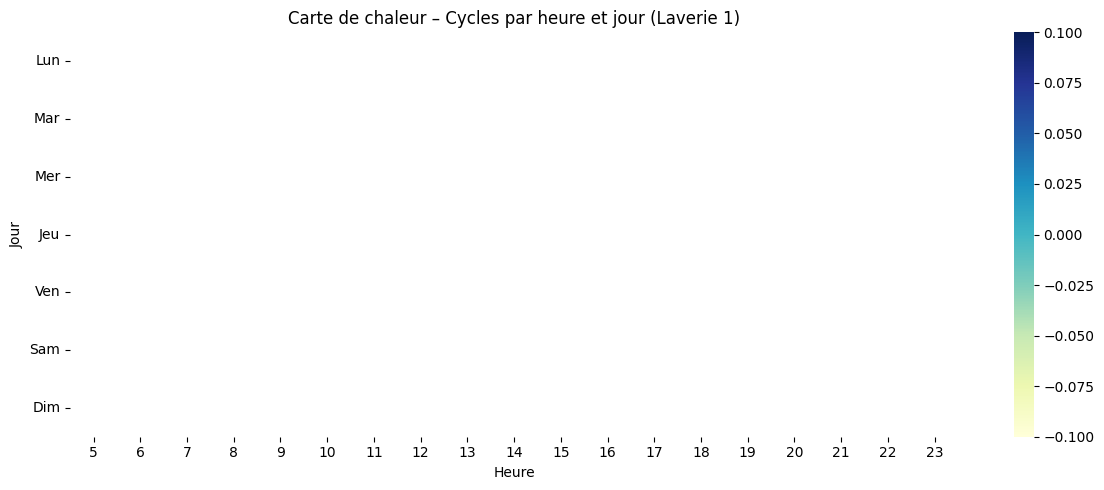

c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


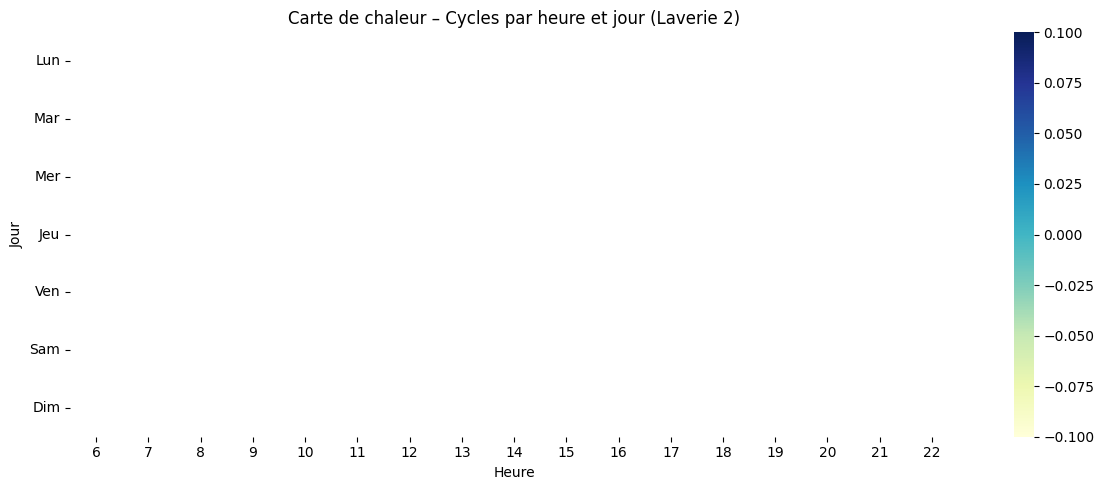


=== Statistiques clés par laverie ===
     laverie  total_cycles  heure_pic  jour_pic
0  Laverie 1          6611         10    Samedi
1  Laverie 2          5316         12  Dimanche


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 1. Chargement ----------
paths = {
    "Laverie 1": "../data_cleaned/laverie1/transactions_transaction_cleaned.csv",
    "Laverie 2": "../data_cleaned/laverie2/transactions_transaction_cleaned.csv",
}

frames = []
for laverie, path in paths.items():
    df = pd.read_csv(path)
    dt_col = [c for c in df.columns if "date" in c.lower() or "heure" in c.lower()][0]
    df[dt_col] = pd.to_datetime(df[dt_col])
    df["laverie"]   = laverie
    df["hour"]      = df[dt_col].dt.hour
    df["weekday"]   = df[dt_col].dt.day_name(locale="fr_FR")   # ex. 'lundi'
    df["weekday_num"] = df[dt_col].dt.weekday                 # 0=lundi
    frames.append(df)

data = pd.concat(frames, ignore_index=True)

# ---------- 2. Moyenne par heure ----------
hourly = (
    data.groupby(["laverie", "hour"])
        .size()
        .reset_index(name="cycles")
)
print("\n=== Moyenne de cycles par heure ===")
print(hourly)

# ---------- 3. Histogrammes ----------
for lav in hourly["laverie"].unique():
    subset = hourly[hourly["laverie"] == lav]
    plt.figure(figsize=(10, 4))
    plt.bar(subset["hour"], subset["cycles"])
    plt.title(f"Nombre moyen de cycles par heure – {lav}")
    plt.xlabel("Heure")
    plt.ylabel("Cycles")
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------- 4. Heatmaps jour × heure ----------
# ordre des jours en français
jours_ordre = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
jours_affiche = ["Lun", "Mar", "Mer", "Jeu", "Ven", "Sam", "Dim"]

for lav in data["laverie"].unique():
    subset = data[data["laverie"] == lav]

    pivot = (
        subset.groupby(["weekday", "hour"])
              .size()
              .unstack(fill_value=0)
              .reindex(index=jours_ordre)      # maintenant les bons labels
    )

    plt.figure(figsize=(12, 5))
    sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d")
    plt.title(f"Carte de chaleur – Cycles par heure et jour ({lav})")
    plt.yticks(ticks=[i + 0.5 for i in range(7)], labels=jours_affiche, rotation=0)
    plt.xlabel("Heure")
    plt.ylabel("Jour")
    plt.tight_layout()
    plt.show()

# ---------- 5. Statistiques clés ----------
stats = (
    data.groupby("laverie")
        .agg(
            total_cycles=("hour", "size"),                # on compte les lignes
            heure_pic=("hour", lambda x: x.value_counts().idxmax()),
            jour_pic=("weekday", lambda x: x.value_counts().idxmax())
        )
        .reset_index()
)
print("\n=== Statistiques clés par laverie ===")
print(stats)


## Analyse financière et comportement de paiement

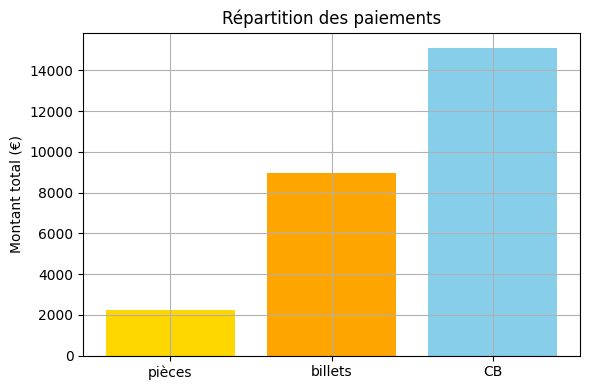


Répartition des paiements (en €) : {'pièces': np.float64(2246.0), 'billets': np.int64(8960), 'CB': np.float64(15082.5)}


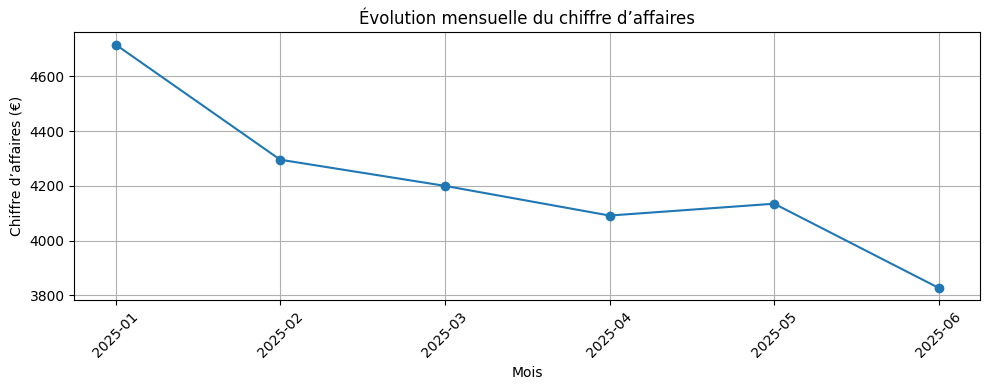


Chiffre d’affaires mensuel :
       mois  ca_tot
0  2025-01  4715.9
1  2025-02  4295.4
2  2025-03  4200.0
3  2025-04  4091.6
4  2025-05  4134.8
5  2025-06  3827.2


C:\Users\pc\AppData\Local\Temp\ipykernel_6876\3990568003.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="heure", y="revenu_total", data=ca_par_heure, palette="Blues_d")


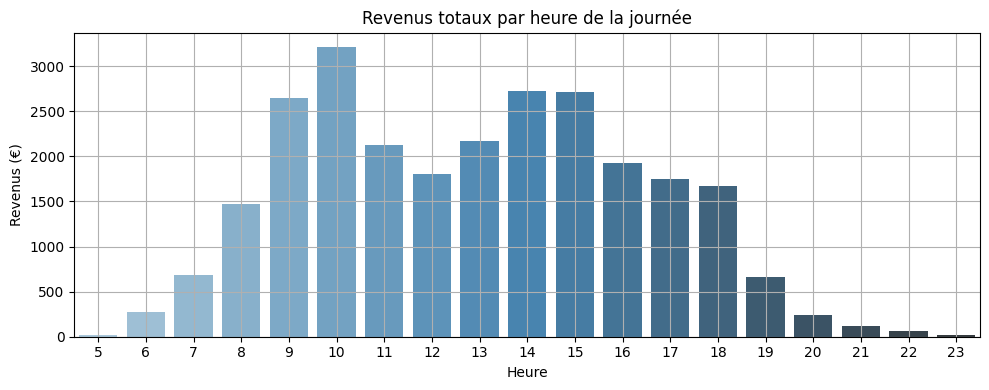


Revenus par heure :
     heure  revenu_total
0       5          14.7
1       6         272.9
2       7         688.3
3       8        1469.8
4       9        2649.1
5      10        3209.8
6      11        2129.7
7      12        1800.3
8      13        2174.1
9      14        2727.2
10     15        2712.4
11     16        1921.9
12     17        1747.7
13     18        1667.6
14     19         666.4
15     20         242.5
16     21         119.6
17     22          60.0
18     23          14.5


In [18]:
# Fichiers
df_transact = pd.read_csv("../data_cleaned/laverie1/transactions_transaction_cleaned.csv", parse_dates=[1])  # ajuster [1] si besoin
df_journalier = pd.read_csv("../data_cleaned/laverie1/transactions_jour_cleaned.csv", parse_dates=["date"])

# Uniformiser noms de colonnes
df_transact.columns = [col.strip().lower() for col in df_transact.columns]
df_journalier.columns = [col.strip().lower() for col in df_journalier.columns]

# Ajouter les colonnes utiles
df_transact["heure"] = df_transact["date/heure(europe/paris)"].dt.hour
df_transact["mois"] = df_transact["date/heure(europe/paris)"].dt.to_period("M")

# Étape 2 : Répartition des paiements (CB / pièces / billets)
# Calcul des totaux par moyen de paiement
paiement_totaux = {
    "pièces": df_transact["pièce"].sum(),
    "billets": df_transact["billet"].sum(),
    "CB": df_transact["carte_bancaire"].sum()
}

# Affichage
plt.figure(figsize=(6, 4))
plt.bar(paiement_totaux.keys(), paiement_totaux.values(), color=['gold', 'orange', 'skyblue'])
plt.title("Répartition des paiements")
plt.ylabel("Montant total (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Impression brute
print("\nRépartition des paiements (en €) :", paiement_totaux)
# Étape 3 : Évolution mensuelle du chiffre d'affaires
# Agréger par mois
df_journalier["mois"] = df_journalier["date"].dt.to_period("M")
ca_mensuel = df_journalier.groupby("mois")["ca_tot"].sum().reset_index()

# Graphique
plt.figure(figsize=(10, 4))
plt.plot(ca_mensuel["mois"].astype(str), ca_mensuel["ca_tot"], marker="o")
plt.title("Évolution mensuelle du chiffre d’affaires")
plt.xlabel("Mois")
plt.ylabel("Chiffre d’affaires (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Impression brute
print("\nChiffre d’affaires mensuel :\n", ca_mensuel)

#  Étape 4 : Rentabilité par créneau horaire
# Somme des paiements (espèces + CB) par heure
df_transact["revenu_total"] = df_transact["pièce"] + df_transact["billet"] + df_transact["carte_bancaire"]
ca_par_heure = df_transact.groupby("heure")["revenu_total"].sum().reset_index()

# Graphique
plt.figure(figsize=(10, 4))
sns.barplot(x="heure", y="revenu_total", data=ca_par_heure, palette="Blues_d")
plt.title("Revenus totaux par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Revenus (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Impression brute
print("\nRevenus par heure :\n", ca_par_heure)



## Analyse sur la maintenance et la gestion monétaire

C:\Users\pc\AppData\Local\Temp\ipykernel_6876\498857461.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="nb_alertes", y="type", data=freq_type, palette="Reds_d")


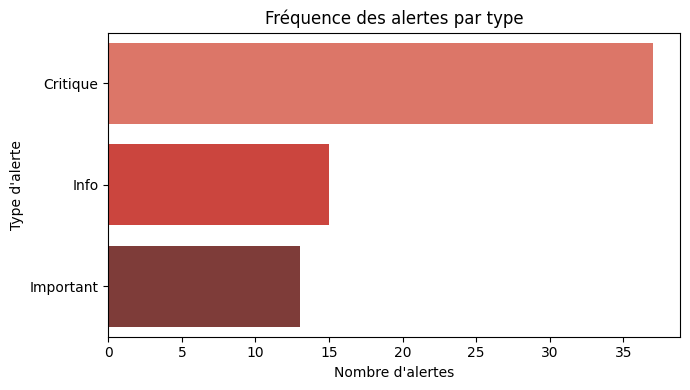

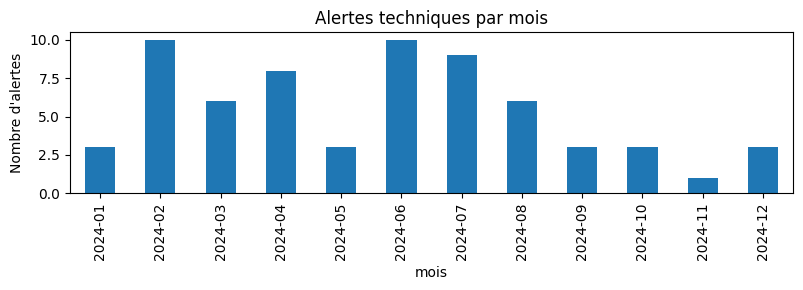


📊 Tableau volume vs alertes :
          volume_encaisse (€)  nb_alertes
mois                                    
2021-01                112.9         0.0
2021-02                214.3         0.0
2021-03                 64.3         0.0
2021-04                  5.0         0.0
2021-05                 10.8         0.0
2021-06                  4.0         0.0
2021-07                101.0         0.0
2021-08                  3.3         0.0
2021-09                171.5         0.0
2021-10                157.9         0.0
2021-11                101.2         0.0
2021-12                190.5         0.0
2022-03                 11.4         0.0
2022-05                 21.5         0.0
2022-06                 10.4         0.0
2022-08                  7.2         0.0
2022-11                 50.5         0.0
2022-12                 68.8         0.0
2023-01                119.7         0.0
2023-02                216.6         0.0
2023-03                248.2         0.0
2023-04                18

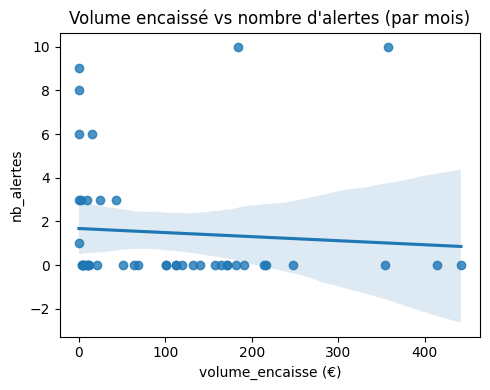


✅ Taux moyen de remplissage : 97.0%


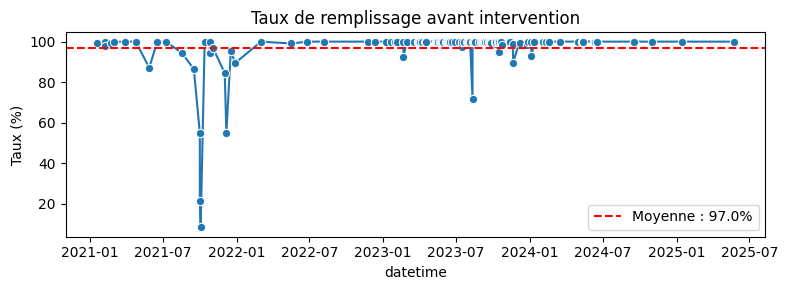

✅ Délai moyen entre deux remplissages : 11.3 jours


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ 1. CHARGEMENT ET NETTOYAGE ------------------

# Forcer noms des colonnes et ignorer la première ligne cassée
df_alert = pd.read_csv(
    "../data_cleaned/laverie1/alertes_cleaned.csv",
    skiprows=1,
    names=["date", "heure", "type", "alerte"]
)

# Nettoyer l'heure (extrait juste HH:MM:SS de "03:36:05Important")
df_alert["heure"] = df_alert["heure"].astype(str).str.extract(r"(\d{2}:\d{2}:\d{2})")

# Supprimer les lignes sans heure valide
df_alert = df_alert.dropna(subset=["heure"])

# Créer datetime et mois
df_alert["datetime"] = pd.to_datetime(df_alert["date"] + " " + df_alert["heure"], errors="coerce")
df_alert = df_alert.dropna(subset=["datetime"])  # si datetime échoue
df_alert["mois"] = df_alert["datetime"].dt.to_period("M")

# Chargement des remplissages
df_fill = pd.read_csv("../data_cleaned/laverie1/remplissages_cleaned.csv")
df_fill.columns = [c.strip().lower() for c in df_fill.columns]
df_fill["datetime"] = pd.to_datetime(df_fill["datetime"], errors="coerce")
df_fill = df_fill.dropna(subset=["datetime"])
df_fill["mois"] = df_fill["datetime"].dt.to_period("M")

# ------------------ 2. FRÉQUENCE DES ALERTES ------------------

if not df_alert.empty:
    # Par type
    freq_type = (
        df_alert.groupby("type")
                .size()
                .reset_index(name="nb_alertes")
                .sort_values("nb_alertes", ascending=False)
    )

    plt.figure(figsize=(7, 4))
    sns.barplot(x="nb_alertes", y="type", data=freq_type, palette="Reds_d")
    plt.title("Fréquence des alertes par type")
    plt.xlabel("Nombre d'alertes")
    plt.ylabel("Type d'alerte")
    plt.tight_layout()
    plt.show()

    # Par mois
    freq_mois = df_alert.groupby("mois").size()

    if not freq_mois.empty:
        freq_mois.plot(kind="bar", figsize=(8, 3), title="Alertes techniques par mois")
        plt.ylabel("Nombre d'alertes")
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Aucun regroupement par mois (freq_mois est vide).")
else:
    print("⚠️ df_alert est vide ou mal formaté.")

# ------------------ 3. CORRÉLATION VOLUME ENCAISSÉ / ALERTES ------------------

vol_mois = df_fill.groupby("mois")["total"].sum()
alert_mois = df_alert.groupby("mois").size()

# Fusion
corr_df = pd.concat([vol_mois, alert_mois], axis=1).fillna(0)
corr_df.columns = ["volume_encaisse (€)", "nb_alertes"]

print("\n📊 Tableau volume vs alertes :\n", corr_df)

# Nuage de points
if not corr_df.empty:
    plt.figure(figsize=(5, 4))
    sns.regplot(x="volume_encaisse (€)", y="nb_alertes", data=corr_df)
    plt.title("Volume encaissé vs nombre d'alertes (par mois)")
    plt.tight_layout()
    plt.show()

# ------------------ 4. TAUX DE REMPLISSAGE & ANTICIPATION ------------------

# Taux de remplissage
df_fill = df_fill[df_fill["trop_plein"] + df_fill["total"] > 0]
df_fill["taux_remplissage"] = (df_fill["total"] / (df_fill["total"] + df_fill["trop_plein"])) * 100
moyen = df_fill["taux_remplissage"].mean().round(1)

print(f"\n✅ Taux moyen de remplissage : {moyen}%")

# Courbe d’évolution
plt.figure(figsize=(8, 3))
sns.lineplot(data=df_fill, x="datetime", y="taux_remplissage", marker="o")
plt.axhline(moyen, color="red", linestyle="--", label=f"Moyenne : {moyen}%")
plt.title("Taux de remplissage avant intervention")
plt.ylabel("Taux (%)")
plt.legend()
plt.tight_layout()
plt.show()

# Délai moyen entre interventions
df_fill = df_fill.sort_values("datetime")
df_fill["delta_jours"] = df_fill["datetime"].diff().dt.days
delai_moy = df_fill["delta_jours"].mean().round(1)

print(f"✅ Délai moyen entre deux remplissages : {delai_moy} jours")


## Consommation énergétique

In [20]:
import pdfplumber
import os
import re
import pandas as pd

# ---------- PARAMÈTRES ----------
facture_dir = "../data_cleaned/edf_factures"     # dossier contenant les 12 PDF
sortie_csv  = "../data_cleaned/conso_elec_laverie.csv"

# Expressions régulières :
regex_kwh = re.compile(r"(\d[\d\s ]+)\s*kWh")       # capture ex. 1 163 kWh (espace fine prise en compte)
regex_ttc = re.compile(r"Facture\s+TTC\s+([\d\s ]+,\d{2})\s*€")

# Abréviations mois EDF → numéro
mois_map = {
    "Jan": 1, "Fév": 2, "Fev": 2, "Mar": 3, "Avr": 4, "Mai": 5, "Juin": 6,
    "Juil": 7, "Aoû": 8, "Aou": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

records = []

# ---------- PARCOURS DES PDF ----------
for pdf_file in sorted(os.listdir(facture_dir)):
    if not pdf_file.endswith(".pdf"):
        continue

    pdf_path = os.path.join(facture_dir, pdf_file)
    conso_kwh  = None
    montant_ttc = None
    mois_facture = None

    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text() or ""
            text = text.replace("\u202f", " ")  # remplace espace fine

            # a) Montant TTC (fonctionne dès qu’on le trouve)
            if montant_ttc is None:
                m_ttc = regex_ttc.search(text)
                if m_ttc:
                    montant_ttc = float(m_ttc.group(1).replace(" ", "").replace(",", "."))

            # b) Mois de facture : présent en haut « Facture du 16/04/2024 »
            if mois_facture is None:
                m_mois = re.search(r"Facture du \d{2}/(\d{2})/(\d{4})", text)
                if m_mois:
                    mois_num = int(m_mois.group(1))
                    annee    = int(m_mois.group(2))
                    mois_facture = pd.Timestamp(year=annee, month=mois_num, day=1)

            # c) Consommation : après le bloc « Evolution de la consommation facturée en kWh »
            if "Evolution de la consommation facturée" in text and conso_kwh is None:
                # prendre la page suivante si besoin
                idx = page.page_number
                bloc_page = text
                if idx + 1 <= len(pdf.pages):
                    bloc_page += "\n" + pdf.pages[idx].extract_text()

                m_kwh = regex_kwh.search(bloc_page)
                if m_kwh:
                    conso_kwh = int(m_kwh.group(1).replace(" ", ""))

    # ---------- AJOUT DU RECORD ----------
    if all(v is not None for v in [mois_facture, conso_kwh, montant_ttc]):
        records.append([mois_facture, conso_kwh, montant_ttc])
    else:
        print(f"⚠️ Données incomplètes dans {pdf_file} – à vérifier manuellement")

# ---------- DATAFRAME & EXPORT ----------
df_energie = pd.DataFrame(records, columns=["mois", "kWh", "euros"])
df_energie = df_energie.sort_values("mois").reset_index(drop=True)

print("\nAperçu :", df_energie.head(12))
df_energie.to_csv(sortie_csv, index=False)
print(f"\n✅ Fichier CSV exporté : {sortie_csv}")



Aperçu :          mois   kWh    euros
0  2024-04-01  1163   645.17
1  2024-05-01  1932   482.74
2  2024-06-01  2043   503.64
3  2024-07-01  2034   530.75
4  2024-08-01  1869   511.81
5  2024-09-01  2350   580.43
6  2024-10-01  2521   599.50
7  2024-11-01  4496  1170.43
8  2024-12-01  3212   917.38
9  2024-12-01  2912  1037.30
10 2025-01-01  3241  1132.79
11 2025-02-01  2940  1089.00

✅ Fichier CSV exporté : ../data_cleaned/conso_elec_laverie.csv


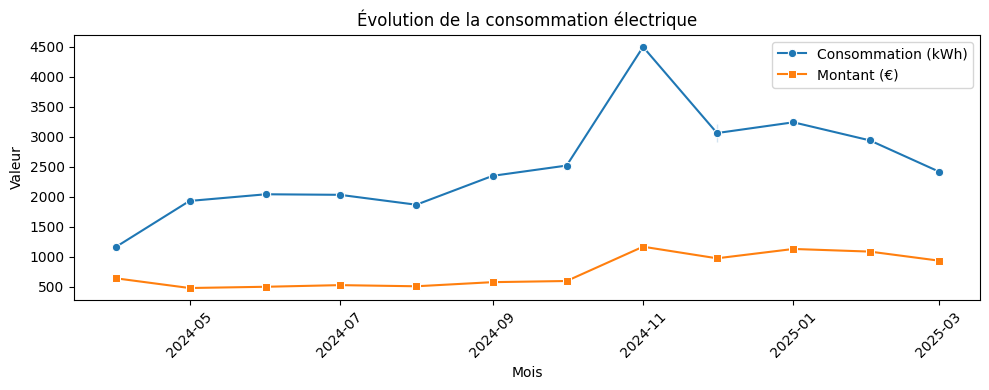

In [21]:
plt.figure(figsize=(10, 4))
sns.lineplot(x="mois", y="kWh", data=df_energie, marker="o", label="Consommation (kWh)")
sns.lineplot(x="mois", y="euros", data=df_energie, marker="s", label="Montant (€)")
plt.title("Évolution de la consommation électrique")
plt.ylabel("Valeur")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Étendre l’extraction des cycles mensuels sur toute la période disponible (2024–2025)
df_lav1 = data[data["laverie"] == "Laverie 1"].copy()

# Extraire le mois depuis la date de transaction
df_lav1["mois"] = df_lav1[dt_col].dt.to_period("M").dt.to_timestamp()

# Regrouper par mois pour obtenir le nombre de cycles
df_frequentation = (
    df_lav1.groupby("mois")
           .size()
           .reset_index(name="nb_cycles")
           .sort_values("mois")
)

print("✅ Fréquentation mensuelle :")
print(df_frequentation)


        mois  nb_cycles
0 2025-01-01       1381
1 2025-02-01       1195
2 2025-03-01       1116
3 2025-04-01       1044
4 2025-05-01       1002
5 2025-06-01        873


In [26]:
# Filtrer df_energie pour ne garder que les mois présents dans df_frequentation
mois_valides = df_frequentation["mois"].unique()
df_energie_filtrée = df_energie[df_energie["mois"].isin(mois_valides)].copy()

# Refaire la fusion sur base filtrée
df_global = pd.merge(df_energie_filtrée, df_frequentation, on="mois", how="left")

# Calculs
df_global["kWh_par_cycle"] = (df_global["kWh"] / df_global["nb_cycles"]).round(2)
df_global["euro_par_cycle"] = (df_global["euros"] / df_global["nb_cycles"]).round(2)
df_global["empreinte_CO2_kg"] = (df_global["kWh"] * 0.079).round(2)
df_global["CO2_par_cycle"] = (df_global["empreinte_CO2_kg"] / df_global["nb_cycles"]).round(2)

print(df_global)


        mois   kWh    euros  nb_cycles  kWh_par_cycle  euro_par_cycle  \
0 2025-01-01  3241  1132.79       1381           2.35            0.82   
1 2025-02-01  2940  1089.00       1195           2.46            0.91   
2 2025-03-01  2421   938.47       1116           2.17            0.84   

   empreinte_CO2_kg  CO2_par_cycle  
0            256.04           0.19  
1            232.26           0.19  
2            191.26           0.17  


In [24]:
#Étape 3 : Croisement avec la fréquentation (demandes)
# Exemple : df_frequentation = DataFrame contenant ["mois", "nb_cycles"]
df_global = pd.merge(df_energie, df_frequentation, on="mois", how="left")

# Ajout de conso/cycle
df_global["kWh_par_cycle"] = df_global["kWh"] / df_global["nb_cycles"]
df_global["euro_par_cycle"] = df_global["euros"] / df_global["nb_cycles"]

print(df_global[["mois", "kWh_par_cycle", "euro_par_cycle"]])


         mois  kWh_par_cycle  euro_par_cycle
0  2024-04-01            NaN             NaN
1  2024-05-01            NaN             NaN
2  2024-06-01            NaN             NaN
3  2024-07-01            NaN             NaN
4  2024-08-01            NaN             NaN
5  2024-09-01            NaN             NaN
6  2024-10-01            NaN             NaN
7  2024-11-01            NaN             NaN
8  2024-12-01            NaN             NaN
9  2024-12-01            NaN             NaN
10 2025-01-01       2.346850        0.820268
11 2025-02-01       2.460251        0.911297
12 2025-03-01       2.169355        0.840923


In [25]:
# Étape 4 : Estimation de l’empreinte carbone
df_global["empreinte_CO2_kg"] = df_global["kWh"] * 0.079
df_global["CO2_par_cycle"] = df_global["empreinte_CO2_kg"] / df_global["nb_cycles"]
